In [1]:
from analysis import *
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

In [11]:
!pwd

/Users/egeerdogan/Desktop/Simbadt/bitcoin


In [58]:
SIM_NAME = "one_node_30m_1_conns"

print(SIM_NAME)
for REP in range(10): 
    REP = 8
    print(REP)
    nodes = []
    for filename in os.listdir(os.fsencode(f'dumps/{REP}_{SIM_NAME}')):
        filename = filename.decode("utf-8")
        with open(f'dumps/{REP}_{SIM_NAME}/{filename}', 'rb') as f:
            nodes.append(pickle.load(f))
            
    # print(f'Loaded {len(nodes)} nodes.')
    # print(f'{nodes[0].timestamp} simulation steps.')

    # blocks = get_all_blocks(nodes)
    # print(f'{len(blocks)} blocks in total.')

    # stale_rates = [stale_block_rate(node) for node in nodes]
    # print(f'Stale block rate: {round(np.mean(stale_rates), 5)}')

    # block_ints = [avg_block_interval(node) for node in nodes]
    # print(f'Average block interval: {np.mean(block_ints)} iters')

    # delays_50 = [block_percentile_delay(block, nodes, 0.5) for id, block in blocks.items()]
    # delays_90 = [block_percentile_delay(block, nodes, 0.9) for id, block in blocks.items()]
    # print(f'50% delay: {round(np.mean(delays_50), 2)} iters')
    # print(f'90% delay: {round(np.mean(delays_90), 2)} iters')

one_node_30m_1_conns
8
8
8
8
8
8
8
8
8
8


In [59]:
blocks = get_all_blocks(nodes)
print(f'{len(blocks)} blocks in total.')

4939 blocks in total.


In [60]:
stale_rates = [stale_block_rate(node) for node in nodes]
print(f'Stale block rate: {round(np.mean(stale_rates), 5)}')

Stale block rate: 0.00011


In [62]:
block_ints = [avg_block_interval(node) for node in nodes]
print(f'Average block interval: {np.mean(block_ints)} iters')

Average block interval: 19970.22012934059 iters


In [63]:
delays_50 = [block_percentile_delay(block, nodes, 0.5) for id, block in blocks.items()]
delays_90 = [block_percentile_delay(block, nodes, 0.9) for id, block in blocks.items()]
print(delays_50)
print(f'50% delay: {round(np.mean(delays_50[:-1]), 2)} iters')
print(f'90% delay: {round(np.mean(delays_90[:-1]), 2)} iters')

[54, 83, 95, 71, 81, 86, 64, 70, 47, 72, 69, 106, 62, 105, 78, 90, 69, 72, 75, 79, 87, 75, 94, 66, 95, 78, 95, 72, 91, 75, 86, 81, 72, 83, 69, 94, 86, 83, 95, 47, 95, 67, 63, 94, 99, 79, 72, 67, 83, 72, 62, 55, 92, 83, 82, 103, 54, 110, 98, 66, 86, 104, 63, 94, 90, 87, 83, 80, 80, 82, 87, 56, 90, 91, 73, 90, 67, 73, 70, 47, 85, 64, 72, 91, 91, 102, 86, 79, 99, 78, 75, 47, 91, 90, 66, 78, 90, 86, 95, 99, 72, 90, 72, 68, 90, 70, 86, 87, 65, 60, 83, 85, 76, 91, 76, 69, 94, 64, 97, 69, 63, 71, 59, 87, 95, 91, 76, 74, 87, 67, 86, 94, 86, 74, 91, 78, 45, 78, 72, 66, 82, 84, 78, 84, 74, 91, 82, 75, 76, 73, 81, 71, 66, 83, 76, 64, 76, 76, 95, 68, 72, 79, 78, 95, 111, 90, 83, 68, 70, 59, 94, 77, 105, 72, 68, 86, 78, 93, 81, 79, 84, 81, 65, 71, 99, 76, 83, 76, 85, 98, 44, 73, 83, 74, 65, 69, 93, 67, 76, 66, 85, 102, 63, 97, 70, 67, 81, 78, 73, 91, 66, 101, 99, 67, 78, 100, 81, 64, 74, 44, 97, 82, 59, 80, 77, 81, 64, 56, 91, 90, 61, 98, 106, 69, 82, 51, 60, 81, 86, 52, 70, 99, 86, 103, 63, 68, 59

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

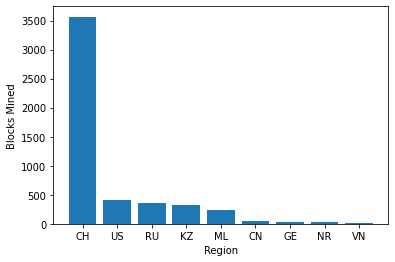

CH 71.01 %
US 8.32 %
RU 7.03 %
KZ 6.35 %
ML 4.62 %
CN 0.92 %
GE 0.76 %
NR 0.6 %
VN 0.4 %


In [17]:
mine_regions = [block.miner.region.name for id, block in blocks.items()]
REGIONS = set(mine_regions)
region_counts = dict()

for region in REGIONS:
    region_counts[region] = mine_regions.count(region)

sorted_counts = dict(sorted(region_counts.items(), key=lambda item: item[1], reverse=True))

plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xlabel('Region')
plt.ylabel('Blocks Mined')
plt.show()

for region, count in sorted_counts.items():
    print(region, round(100*count / sum(sorted_counts.values()), 2), '%')

In [64]:
for node in nodes:
    print(node.id[-2:], [n[-2:] for n in node.ins])

0b ['83', 'ad', 'eb']
2b ['4c', '28']
37 ['eb']
ad ['0b']
f1 ['4c']
eb ['37', '0b']
83 ['0b']
4c ['2b', 'f1']
28 ['2b']
